# URL study

## Import

In [1]:
import pandas as pd

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

import sys
import url_util as ut
sys.path.insert(0, '../')
import general_utils as gen_ut

## Dataset preparation

In [2]:
df = pd.read_csv('../tweets.csv',low_memory=False,
                 usecols=['urls','created_at'])

In [3]:
df['created_at'] = pd.to_datetime(df['created_at'], format="%a %b %d %X %z %Y")

### Visualizaiton by histogram

In [4]:
dfUrls = ut.df_url_counter(df)
dfUrls = ut.url_credibility('../1_Dataset_preparation/data/credibility.csv',dfUrls)
dfUrls 

,count,Class
url,,
twitter.com,302515,none
informazione.it,44072,high
youtube.com,21444,none
corriere.it,16648,high
imolaoggi.it,15228,low
...,...,...
giornata.Zero,1,none
web2meet.net,1,none
gomorraweb.com,1,none


In [5]:
total = sum(dfUrls['count'])
print('Credibility:')

for c in dfUrls['Class'].unique():
    summation = sum(dfUrls.loc[dfUrls['Class']==c,'count'])
    print('\t%s:\t %d  \t %d%%'%(c,summation,summation*100/total))

Credibility:
	none:	 670976  	 69%
	high:	 221167  	 22%
	low:	 73852  	 7%


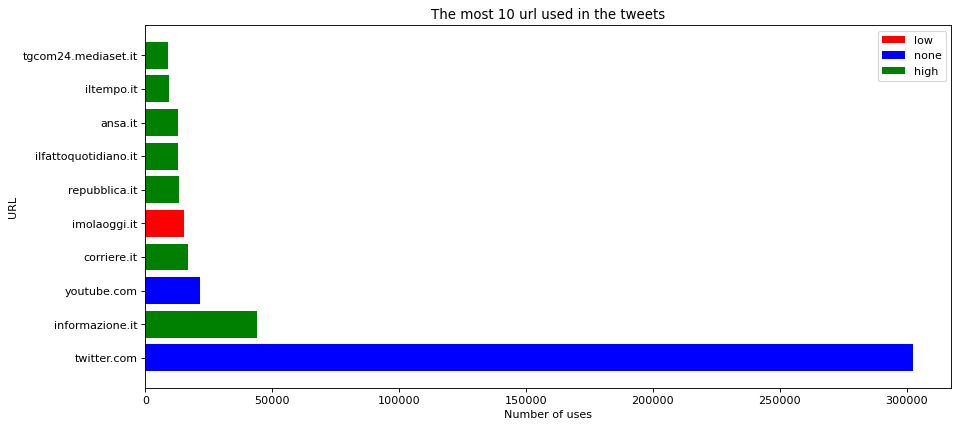

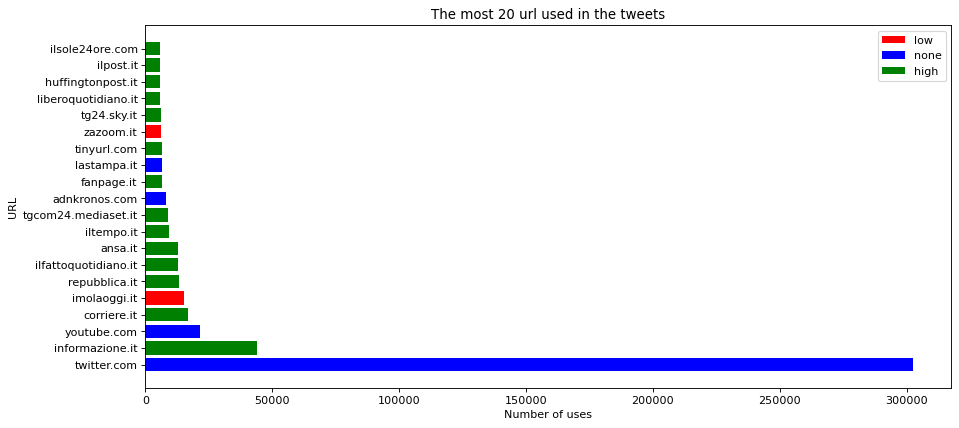

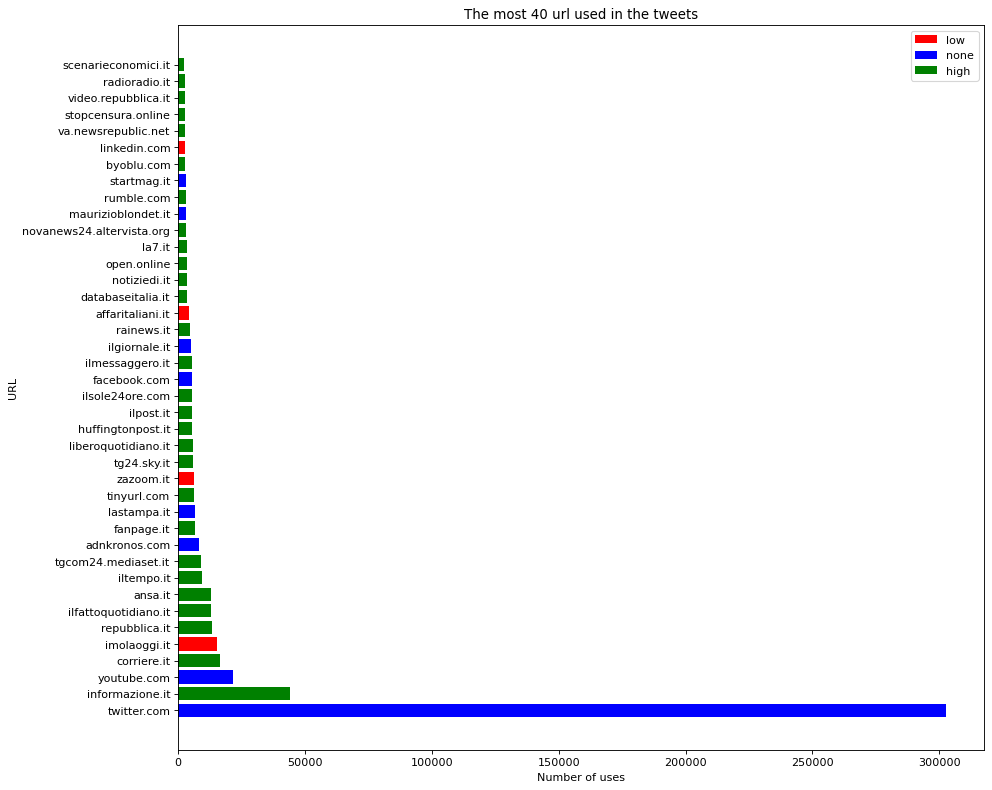

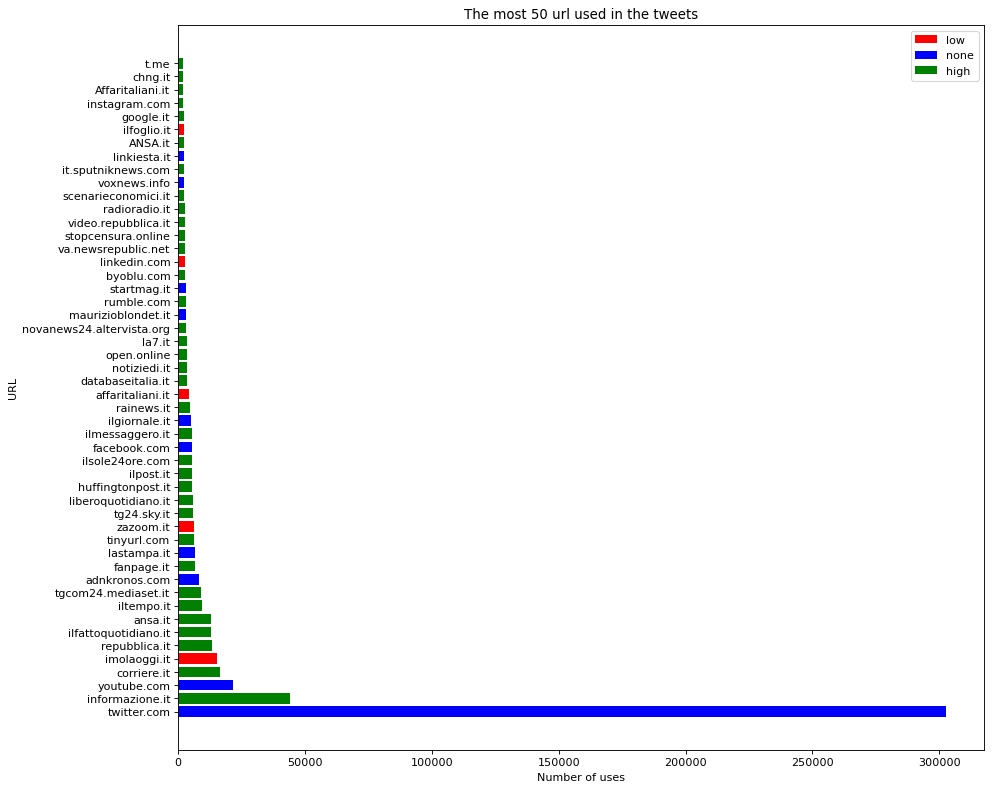

In [6]:
colors = {'low': 'r', 'none': 'b', 'high': 'g'}

for i in (10,20,40,50): 
    if i < 30:
        figure(figsize=(13, 6), dpi=80)
    else:
        figure(figsize=(13, 12), dpi=80)
    
    for n,c in colors.items():
        plt.hist([0],color=c,label=n)
    
    plt.barh(dfUrls.head(i).index,width=dfUrls.head(i)['count'], color=[colors[i] for i in dfUrls.head(10)['Class']])
    plt.legend()

    plt.xlabel('Number of uses')
    plt.ylabel('URL')
    plt.title("The most %d url used in the tweets"% i)
    plt.show()

In [7]:
dfUseUrl = ut.process_dfUse(df)
dfUseUrl

,Week/Year,url,count
62201,2020-01-06,rainews.it,17
62195,2020-01-06,playhitmusic.it,1
62196,2020-01-06,pokodemim.blogspot.com,1
62197,2020-01-06,quotidianosanita.it,1
62198,2020-01-06,radiolombardia.it,1
...,...,...,...
9524,2021-05-17,orizzontescuola.it,9
9525,2021-05-17,orizzontinternazionali.org,1
9526,2021-05-17,orvieto24.it,1
9528,2021-05-17,ossolanews.it,1


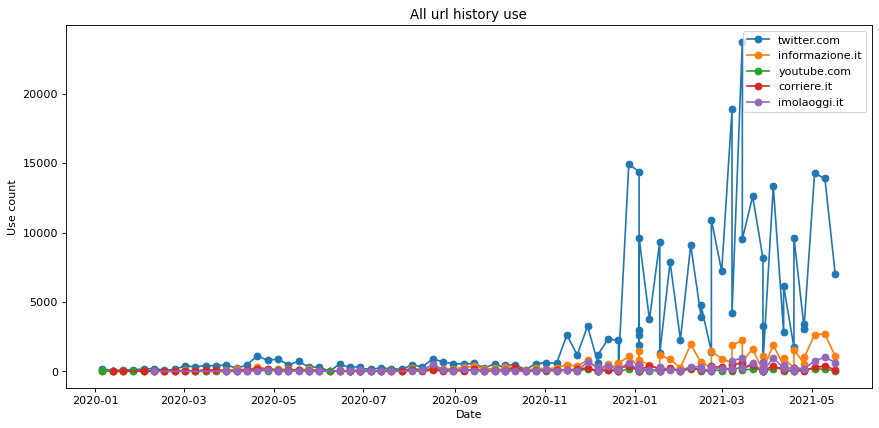

In [8]:
figure(figsize=(13, 6), dpi=80)

for w in dfUrls.head().index:
    mask = dfUseUrl['url'] == w
    plt.plot(dfUseUrl.loc[mask,'Week/Year'],dfUseUrl.loc[mask,'count'],'o-',label=w)

plt.legend()   
plt.title('All url history use')
plt.xlabel('Date')
plt.ylabel('Use count')

plt.show()

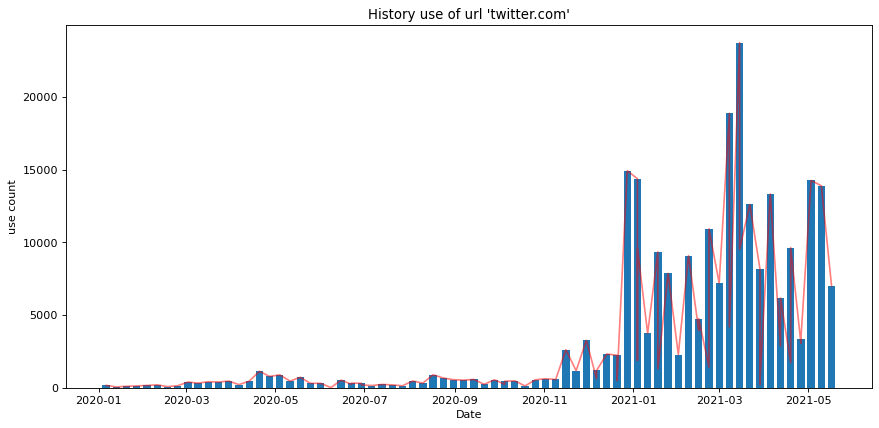

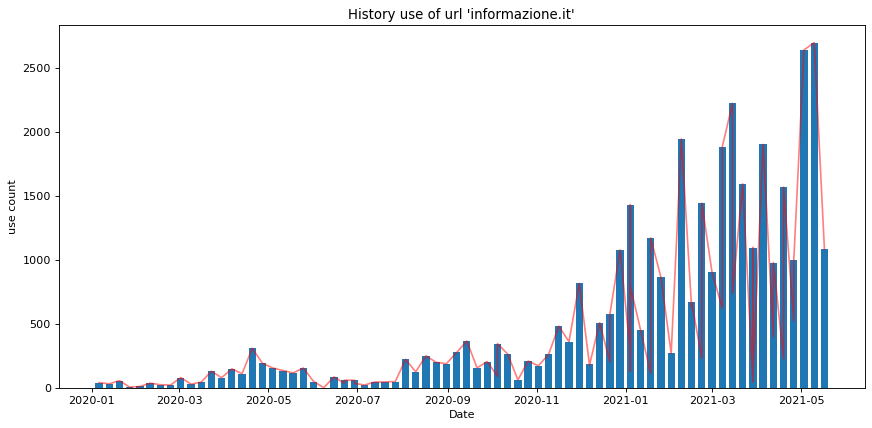

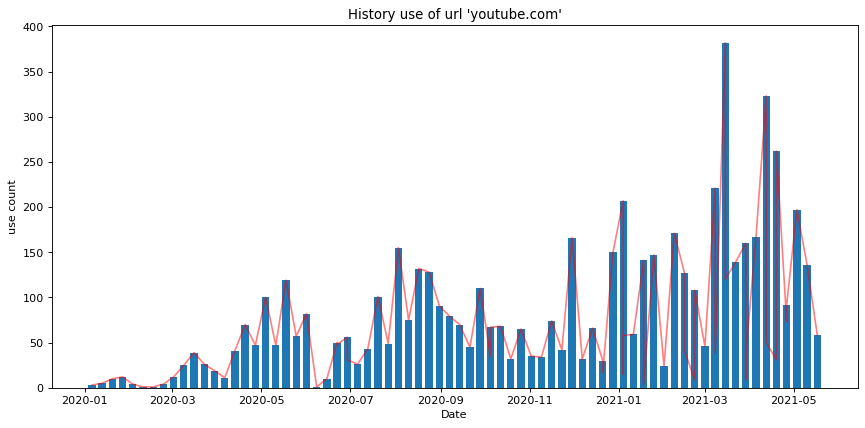

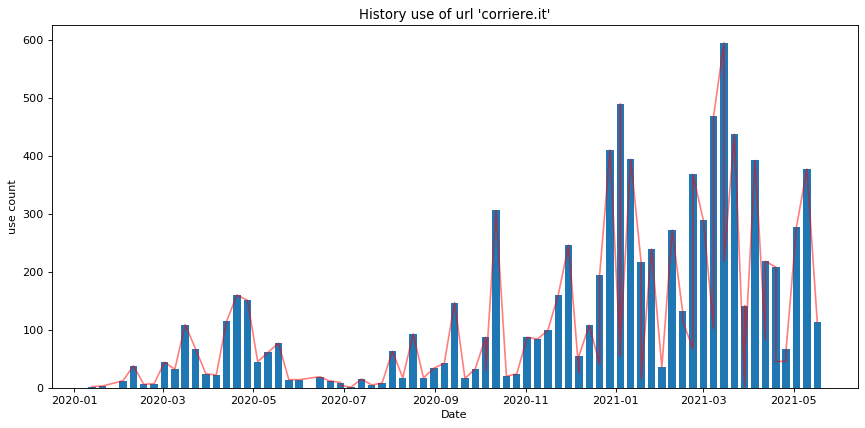

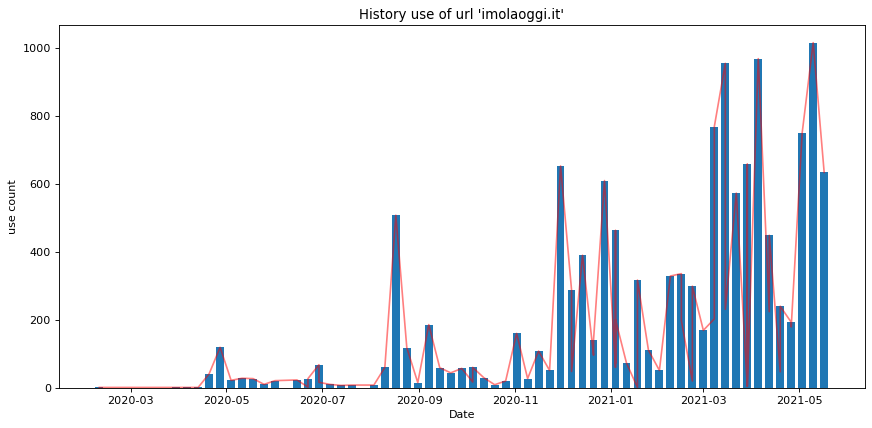

In [9]:
#All in different graphic
for w in dfUrls.head().index:
    mask = dfUseUrl['url'] == w
    figure(figsize=(13, 6), dpi=80)
    
    plt.bar(dfUseUrl.loc[mask,'Week/Year'],height=dfUseUrl.loc[mask,'count'],width=5)
    plt.plot(dfUseUrl.loc[mask,'Week/Year'],dfUseUrl.loc[mask,'count'],color='r',alpha = 0.5)
    
    plt.title("History use of url '%s'"%w)
    plt.xlabel('Date')
    plt.ylabel('use count')

    plt.show()